In [402]:
import numpy as np
import matplotlib.pyplot as plt

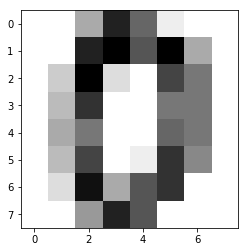

In [403]:
from sklearn.datasets import load_digits

mnist = load_digits()
plt.imshow(mnist.images[0], cmap='gray_r');

In [404]:
from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

X_train, y_train, test_x, test_y = train_test_split(X, y, test_size=0.4, random_state=12)

n_classes = len(np.unique(test_x))

X_test = np.zeros(shape=(len(test_x), n_classes))
y_test = np.zeros(shape=(len(test_y), n_classes))

# should be refactored
for i in range(len(X_test)):
    X_test[i][test_x[i]] = 1

for i in range(len(y_test)):
    y_test[i][test_y[i]] = 1

(array([[6]]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

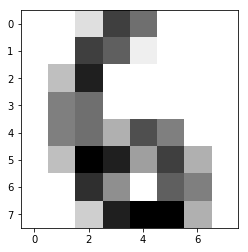

In [406]:
# quick test

random_image_index = np.random.randint(len(X_train))

plt.imshow(X_train[random_image_index].reshape(8, 8), cmap='gray_r');
np.argwhere(X_test[random_image_index] == 1), X_test[random_image_index]

In [423]:
# define softmax
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

In [646]:
class LogisticRegression:
    
    """Logistic regression for multi class classification problems."""
    
    def __init__(self, lr):
        
        self.lr = lr
        
        self.weights = []
        self.bias = []
        
        self.losses = []
        self.steps_count = 0
        
    def train(self, X, y, n_classes, max_steps=3):
        rnd = np.random.RandomState(124)
        
        self.W = rnd.normal(0, 1, (X.shape[1], n_classes))
        self.w0 = rnd.normal(0, 1, n_classes)
        
        while True:
            self.__iter_over_data(X, y)
            
            self.steps_count += 1
            if self.steps_count == 1:
                break
                
        return self
                
    def predict(self, x):
        return softmax(self.W.T.dot(x) + self.w0)
    
    def predict_all(self, y_train):
        return [self.predict(x).round() for x in y_train]
    
    def score(self, y_train, y_test):
        return np.sum(self.predict_all(y_train) == y_test) / len(y_train)
    
    def update_weights(self, grad_w0, grad_W):
        self.weights.append(self.W.copy())
        self.bias.append(self.w0.copy())
        
        self.w0 -= self.lr * grad_w0
        self.W -= self.lr * grad_W
        
    def __iter_over_data(self, X, T):
        
        for x, t_vector in zip(X, T):
            pred_vector = self.predict(x)
            
            loss = self.__loss(pred_vector, t_vector)
            self.losses.append(loss)
            
            self.__grad(x, pred_vector, t_vector)
#             self.update_weights(*grad)
    
    def __loss(self, y, t):
        return -(t.dot(np.log(y)))
    
    def __grad(self, x, pred, target):
#         return (y - t), (y - t) * x
        self.weights.append(self.W.copy())
        self.bias.append(self.w0.copy())

#         print(pred)
#         self.w0 -= self.lr * (pred - target)
#         self.W -= self.lr * (pred - target) * x.reshape(-1, 1)

In [665]:
log_reg = LogisticRegression(0.2)
log_reg.train(X_train, X_test, n_classes)

log_reg.predict_all(X_train)

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),


In [569]:
# cross validation

folds = 5
fold_size = len(X_train)//folds
models_and_scores = []

for fold in range(folds):
    mask = np.ones(len(X_train), dtype=bool)
    mask[fold * fold_size : (fold + 1) * fold_size] = False
    
    x_train, y_train = X_train[mask], X_train[~mask]
    x_test, y_test = X_test[mask], X_test[~mask]
    
    model = LogisticRegression(0.2).train(x_train, x_test, n_classes)
    models_and_scores.append((model, model.score(y_train, y_test)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
